# Motif Analysis

Analysing graphs according to their 3-node motifs.


In [3]:
import os
import os.path as op
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import datetime

In [4]:
# Graph analysis functions
from compile_graphs_dataset import get_graphs, graph_properties, exclude_empty_graphs
from graph_analysis_functions import print_bidirectional_edges, print_parallel_edges, get_parallel_edges

# Motif analysis functions
from motif_helper_functions import motifs, rasterplot, biplot

In [5]:
# +++ Set Paths +++
# Input directory for graph and motif data
graph_dir = '/Users/CN/Dropbox/speech_graphs/oasis'
# Output directory for tables
output_dir = op.join(graph_dir,'output')
# Output directory for figures
output_figures = op.join(graph_dir,'figures')

In [6]:
# +++ Import Data +++
# --------------------- Import graph data ---------------------------------------
graph_data = op.join(output_dir, 'graph_data.csv')
df = pd.read_csv(graph_data)

# --------------------- Import motif counts ---------------------------------------
# If already counted and motif_counts.csv exists, imports motif count data
try:
    # Import motif count data
    motif_counts = pd.read_csv(op.join(output_dir, 'motif_counts.csv'))
    # df = pd.read_csv(op.join(graph_data))
except FileNotFoundError:
    print('----- Error: Cannot find {}} -----\nIt seems motifs have not been counted yet.\nRun motifs.py to count motifs before running this cell.'.format(graph_data))

# --- Compile graphs data (basic properties and motifs) and save ---
for column in motif_counts.columns:
    df[column] = motif_counts[column]




In [7]:
# ----------- Quick inspection -----------
# shows missing values as null count (if non-null count == number of entries, then there are no missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 45 columns):
Unnamed: 0                    423 non-null int64
subj                          423 non-null int64
tat                           423 non-null int64
words                         423 non-null int64
sentences                     423 non-null int64
nodes                         423 non-null int64
edges                         423 non-null int64
unconnected                   423 non-null int64
average_total_degree          423 non-null float64
parallel_edges                423 non-null int64
bidirectional_edges           423 non-null int64
lsc                           423 non-null int64
lcc                           423 non-null int64
L1                            423 non-null int64
L2                            423 non-null int64
L3                            423 non-null int64
sizes_connected_components    423 non-null object
connected_components          423 non-null int64
max_degree

In [8]:
# ----------- Summary stats on motif counts -----------
# shows missing values as null count (if non-null count == number of entries, then there are no missing values)
motif_cols = list(motifs.keys())
df[motif_cols].describe()

,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12,m13
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.0
mean,6.534279,7.666667,0.728132,2.387707,0.236407,0.004728,0.486998,0.075650,0.052009,0.016548,0.018913,0.004728,0.0
std,6.490834,7.473175,1.857312,3.320344,0.584879,0.097243,1.369677,0.460731,0.222309,0.127723,0.136377,0.068680,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,5.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,9.000000,11.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,43.000000,47.000000,13.000000,23.000000,5.000000,2.000000,10.000000,7.000000,1.000000,1.000000,1.000000,1.000000,0.0


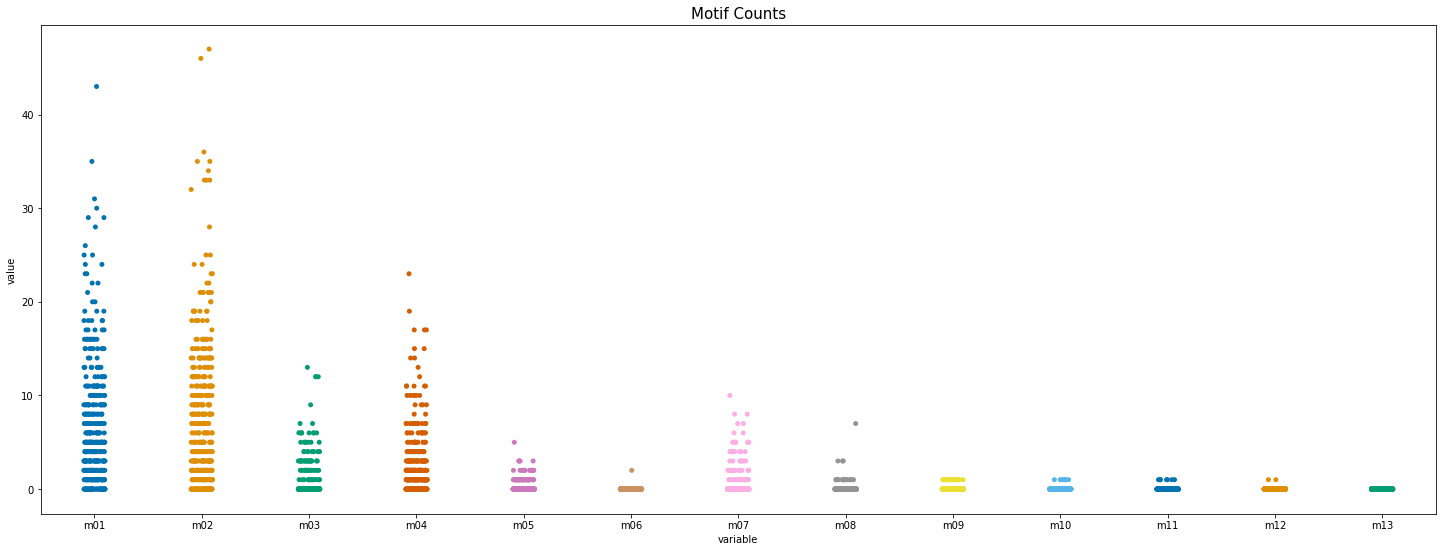

In [9]:
# ----------- Plot Motif Counts : Stripplot -----------
# Reformat df for strip plot
df_m = pd.melt(df, id_vars=df.columns[0], value_vars=motif_cols)
# strip plot
fig = plt.figure(figsize=(25, 9))
plt.title('Motif Counts', fontsize=15)
sns.stripplot(y='value', x='variable',
              data=df_m,
              palette="colorblind",
              )

output = op.join(output_figures, 'Scatter_motif_counts' +
                 '_{0}'.format(str(datetime.date.today())))
plt.savefig(output)
plt.show()

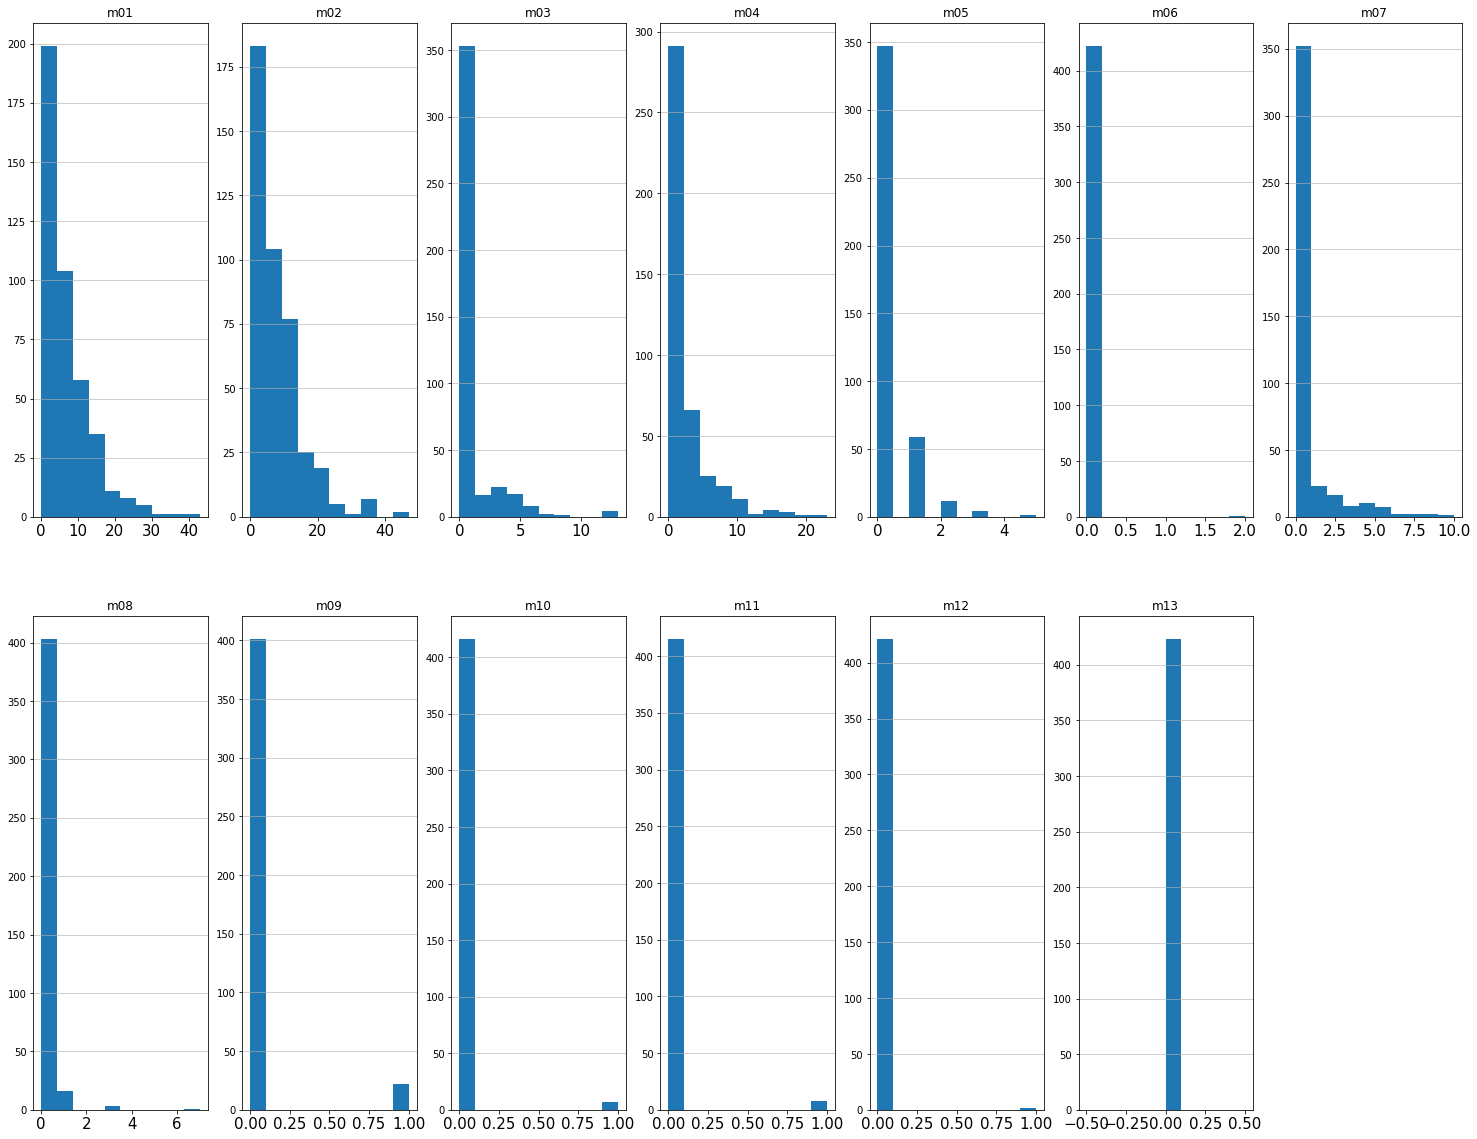

In [10]:
# ----------- Plot Motif Counts : Histogram -----------
fig = plt.figure(figsize=(25.6, 20))
no_motifs = len(motifs)
for m, mkey in enumerate(motifs):
    ax = plt.subplot(2, int(np.ceil(no_motifs / 2)), m + 1)
    plt.hist(df[mkey])  # , bins=100)
    plt.grid(axis='y', alpha=0.75)
    # plt.ylabel('Frequency', fontsize=15)
    plt.xticks(fontsize=15)
    plt.title(mkey)

output = op.join(output_figures, 'Hist_motif_counts' +
                 '_{0}'.format(str(datetime.date.today())))
plt.savefig(output)
plt.show()

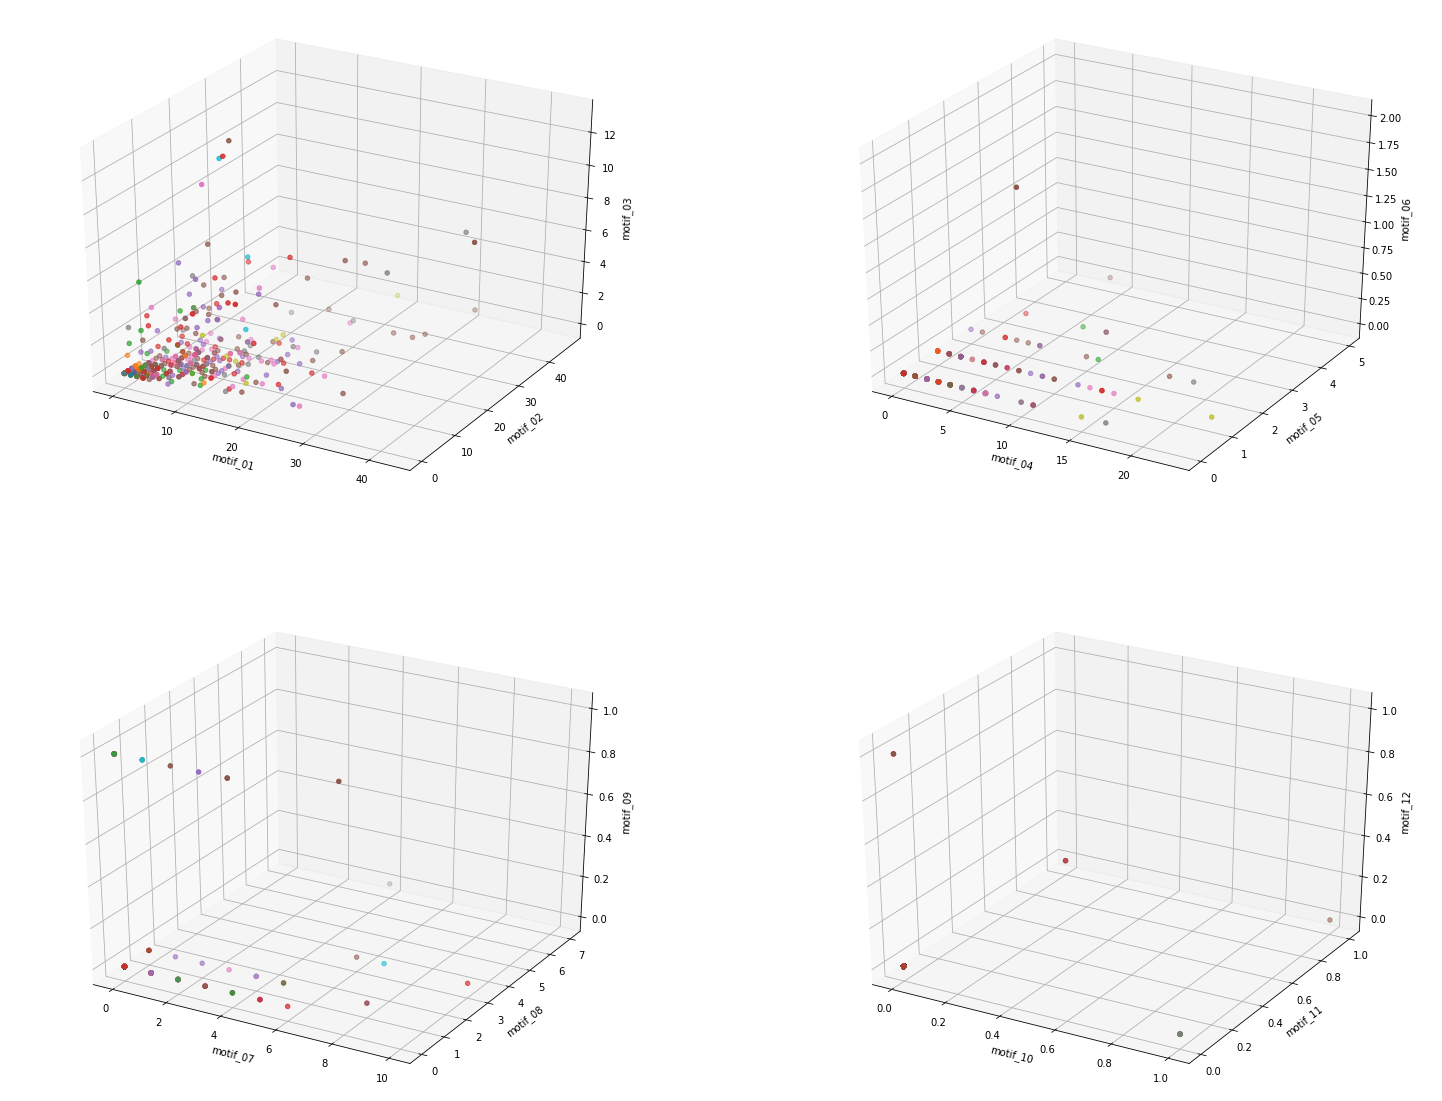

In [11]:
# ----------- Plot Motif Counts : 3D - coloured by node number -----------
fig = plt.figure(figsize=(25.6, 20))
for m in range(0, 12, 3):
    ax = fig.add_subplot(2, 2, int((m / 3) + 1), projection='3d')
    ax.scatter(
        xs=df[f'm{m+1:02d}'],
        ys=df[f'm{m+2:02d}'],
        zs=df[f'm{m+3:02d}'],
        c=pd.to_numeric(df.nodes),
        cmap='tab10',
    )
    ax.set_xlabel(f'motif_{m+1:02d}')
    ax.set_ylabel(f'motif_{m+2:02d}')
    ax.set_zlabel(f'motif_{m+3:02d}')


output = op.join(output_figures, 'Motif_counts_3d_colored-nodes' +
                 '_{0}'.format(str(datetime.date.today())))
plt.savefig(output)
plt.show()


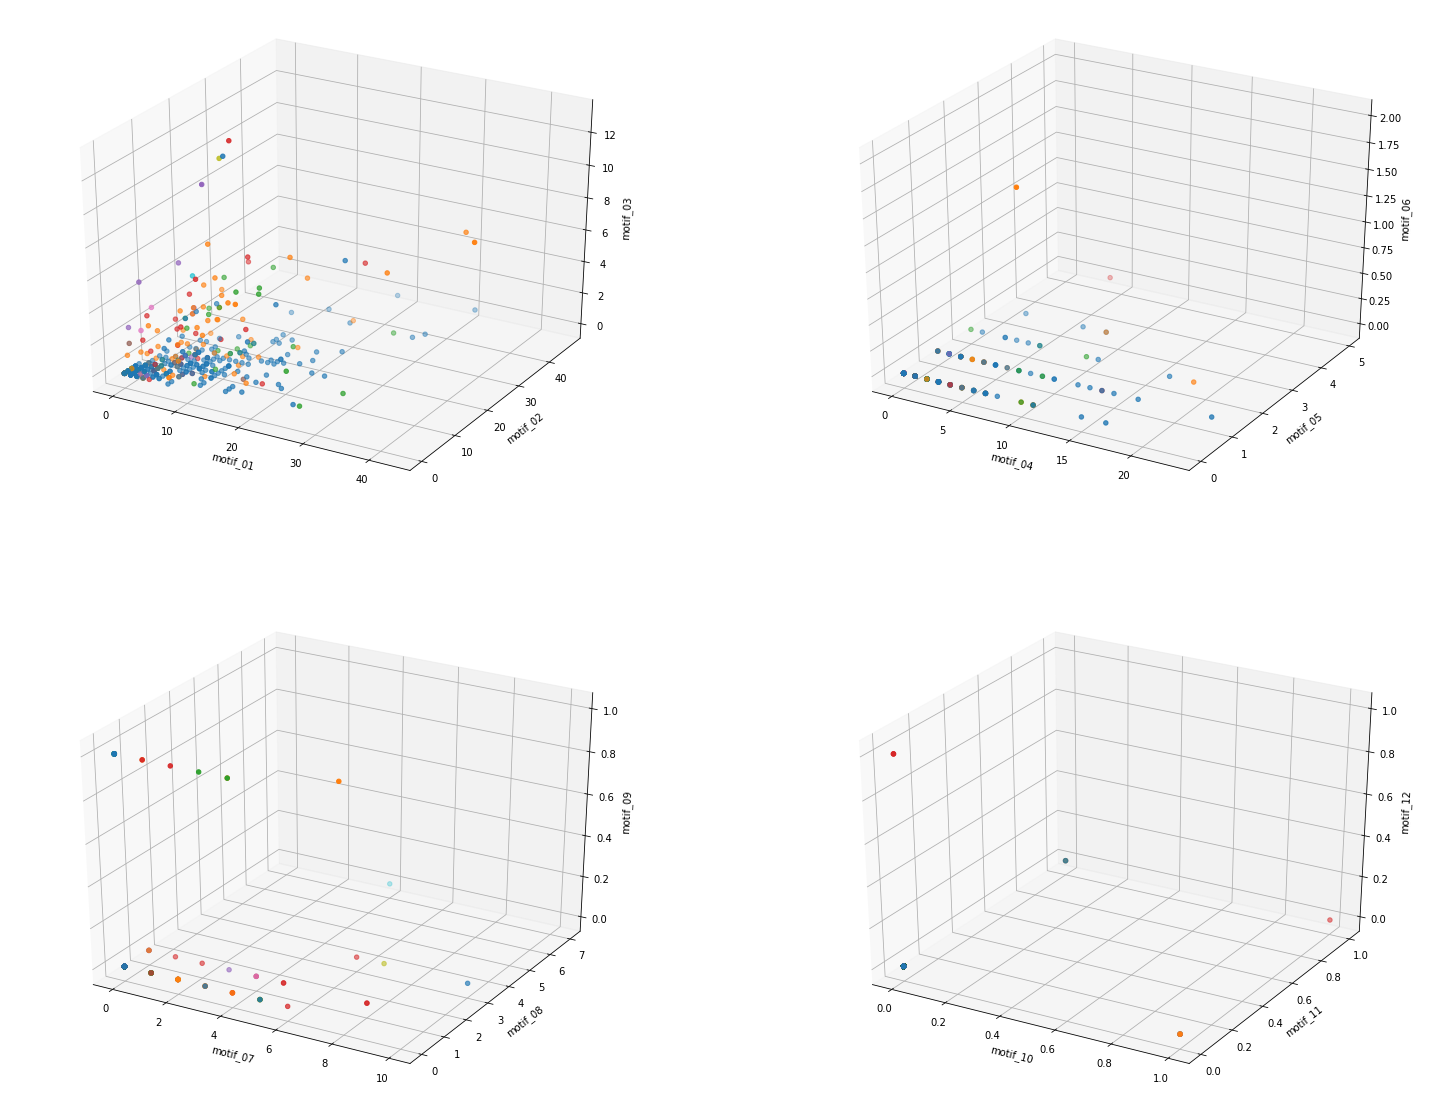

In [12]:
# ----------- Plot Motif Counts : 3D - coloured by bidirectional edges -----------
fig = plt.figure(figsize=(25.6, 20))
for m in range(0, 12, 3):
    ax = fig.add_subplot(2, 2, int((m / 3) + 1), projection='3d')
    ax.scatter(
        xs=df[f'm{m+1:02d}'],
        ys=df[f'm{m+2:02d}'],
        zs=df[f'm{m+3:02d}'],
        c=pd.to_numeric(df.bidirectional_edges),
        cmap='tab10',
    )
    ax.set_xlabel(f'motif_{m+1:02d}')
    ax.set_ylabel(f'motif_{m+2:02d}')
    ax.set_zlabel(f'motif_{m+3:02d}')

output = op.join(output_figures, 'Motif_counts_3d_colored-bidirect' +
                 '_{0}'.format(str(datetime.date.today())))
plt.savefig(output)
plt.show()

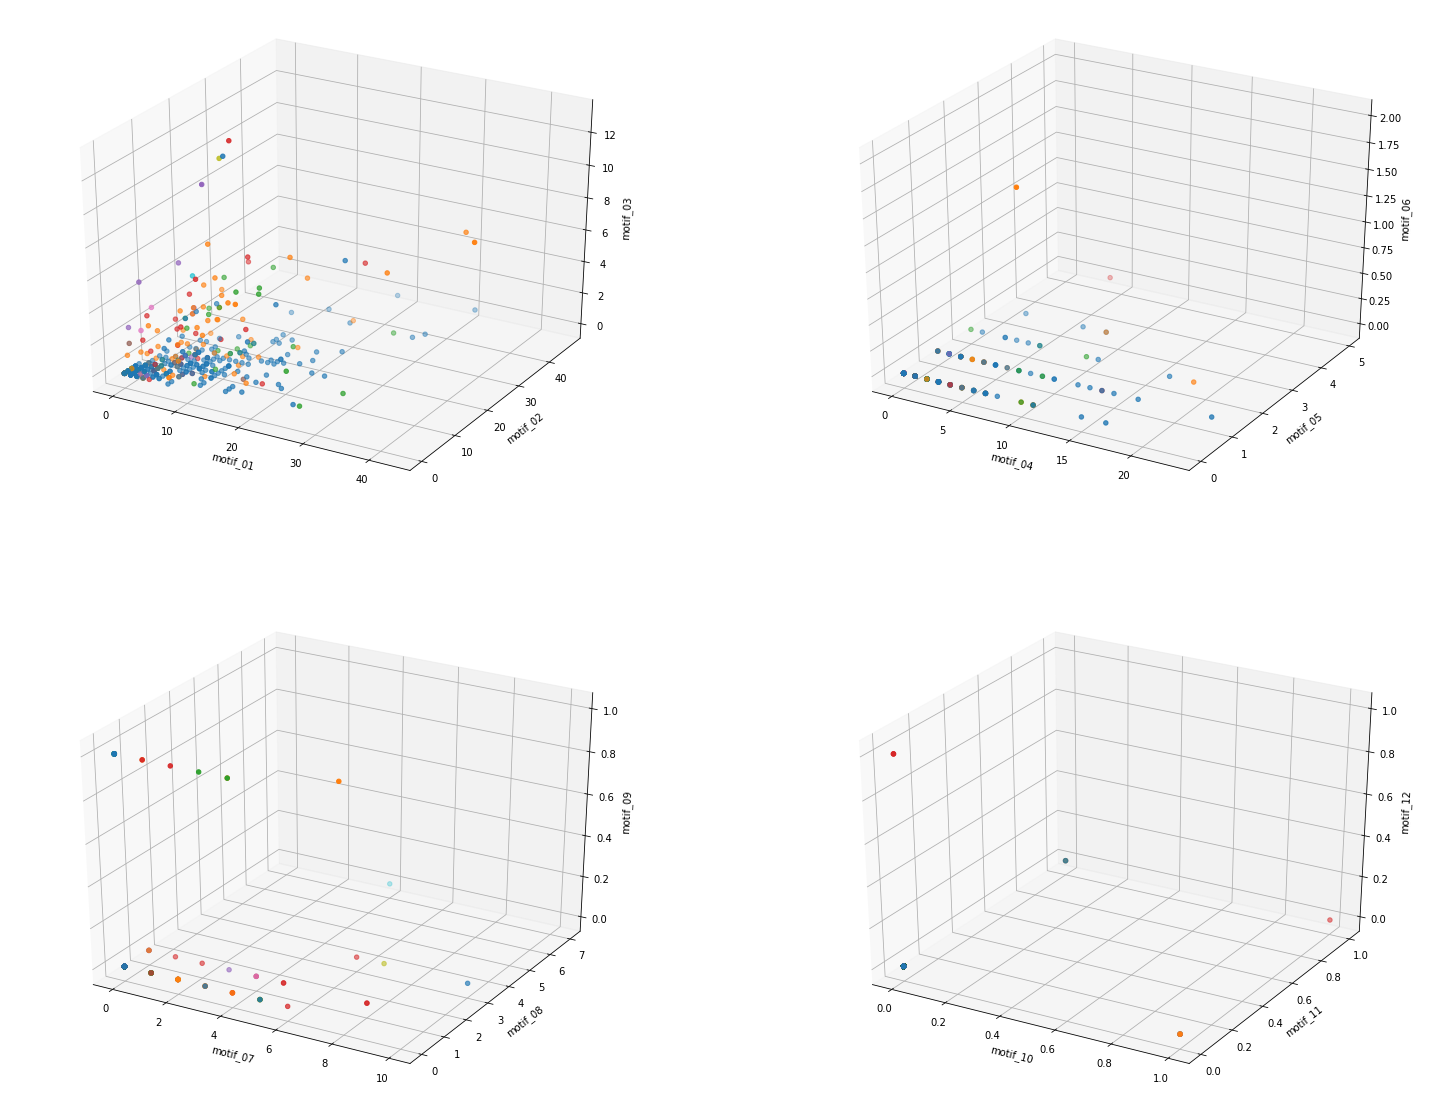

In [13]:
# ----------- Plot Motif Counts : 3D - coloured by bidirectional edges -----------
fig = plt.figure(figsize=(25.6, 20))
for m in range(0, 12, 3):
    ax = fig.add_subplot(2, 2, int((m / 3) + 1), projection='3d')
    ax.scatter(
        xs=df[f'm{m+1:02d}'],
        ys=df[f'm{m+2:02d}'],
        zs=df[f'm{m+3:02d}'],
        c=pd.to_numeric(df.bidirectional_edges),
        cmap='tab10',
    )
    ax.set_xlabel(f'motif_{m+1:02d}')
    ax.set_ylabel(f'motif_{m+2:02d}')
    ax.set_zlabel(f'motif_{m+3:02d}')

output = op.join(output_figures, 'Motif_counts_3d_colored-bidirect' +
                 '_{0}'.format(str(datetime.date.today())))
plt.savefig(output)
plt.show()